## What worked is, Equation 8 of https://journals.aps.org/prb/pdf/10.1103/PhysRevB.106.064109

In [57]:
using Plots
using LinearAlgebra
using LaTeXStrings
using StatsBase
using CSV
using DataFrames

In [58]:
function matrix_signature(LMaxtrix)
    eigsL = eigvals(LMaxtrix);
    pos_count = 0;
    neg_count = 0;
    for eig in eigsL
        if real(eig) > 0
            pos_count += 1;
        elseif real(eig) < 0
            neg_count += 1;
        end
    end
    return (pos_count - neg_count)
end

matrix_signature (generic function with 1 method)

In [59]:
t_start = time();

## Parameters:

In [ ]:
t0 = 1.0;
t = 1.0;
m_0 = -1.0;
Delta = 1.0;
x_periodic = 0;
y_periodic = 0;

L = 20;

Lx = L;
Ly = L;

exportdata=1;

In [61]:
points_x_array = range(1, L,L)
points_y_array = range(1, L,L)

points2 = zeros(2*L^2)
for ii = 1:L
    for jj = 1:L
        points2[2*((jj-1)*L+ii)-1] = points_x_array[ii]
        points2[2*((jj-1)*L+ii)] = points_y_array[jj]
    end
end


### These arrays have N^2 elements, and hold the x and y coordinates of nth site
points_x_array = points2[1:2:end]
points_y_array =  points2[2:2:end]

site_index = range(1,L^2, L^2)

1.0:1.0:400.0

## Generate Parent Hamiltonian

In [62]:
include("generate_matrices1D.jl")
include("generate_matrices2D.jl")
include("angmom.jl")

generate_spin_matrices (generic function with 1 method)

In [63]:
println("t = ",t)
println("m_0 = ", m_0)
println("Delta = ",Delta)
println("Lx = ", Lx)
println("Ly = ", Ly)

t = 1.0
m_0 = -1.0
Delta = 1.0
Lx = 20
Ly = 20


In [64]:
if(x_periodic^2 != x_periodic || y_periodic^2 != y_periodic)
    println("x_periodic and y_periodic must be 0 or 1")
    println("You entered x_periodic = ", x_periodic, " y_periodic = ", y_periodic)
    return
end

In [65]:
sigma_x = [0 1;
           1 0];
sigma_y = [0 -im;
           im 0];
sigma_z = [1 0;
           0 -1];
eye2 = [1 0;
        0 1];
gamma_01 = kron(eye2, sigma_x);
gamma_02 = kron(eye2, sigma_y);
gamma_03 = kron(eye2, sigma_z);
gamma_10 = kron(sigma_x, eye2);
gamma_13 = kron(sigma_x, sigma_z);
gamma_20 = kron(sigma_y, eye2);
gamma_30 = kron(sigma_z, eye2);
gamma_31 = kron(sigma_z, sigma_x);
gamma_32 = kron(sigma_z, sigma_y);
gamma_33 = kron(sigma_z, sigma_z);

In [66]:
const_2D, CX2D, SX2D, CY2D, SY2D, CXCY2D, SXCY2D, CXSY2D = generate_matrices_2D(Lx,Ly,x_periodic,y_periodic)

CXCY2D= Nothing
SXCY2D= Nothing
CXSY2D= Nothing

Verified: Building Block Matrices are Hermitian


Nothing

In [67]:
h_2DHO = t*kron(SX2D,gamma_31) + t*kron(SY2D,gamma_32) + kron(m_0*const_2D + t0*(CX2D + CY2D),gamma_33) + Delta*kron(CX2D - CY2D,gamma_10)

if(Hermitian_Check(h_2DHO) == false)
    println("Error! Hamiltonian is not Hermitian")
    return
end

In [68]:
XList_parent = kron(range(1,1,Ly),range(1,Lx,Lx))
YList_parent = kron(range(1,Ly,Ly),range(1,1,Lx))

X1_parent = kron(diagm(XList_parent),eye2,eye2)
Y1_parent = kron(diagm(YList_parent),eye2,eye2)

X1_parent_shifted = X1_parent - (round(Lx/2) + 0.5)*kron(const_2D,eye2,eye2);

D1_parent = (X1_parent + Y1_parent)/2;

In [69]:
chiral_matrix = kron(const_2D,gamma_20);

In [70]:
L_x_matrix = (X1_parent_shifted + im*h_2DHO)*chiral_matrix;

In [71]:
Hermitian_Check(L_x_matrix)

true

In [72]:
0.5*matrix_signature(L_x_matrix)

0.0

## Check that chiral_matrix anticommutes with Hamiltonian

In [73]:
maximum(abs.(h_2DHO * chiral_matrix + chiral_matrix * h_2DHO))

0.0

## Check that chiral_matrix anticommutes with X operator

In [74]:
maximum(abs.(X1_parent_shifted * chiral_matrix - chiral_matrix * X1_parent_shifted))

0.0

In [75]:
4*L^2

1600

In [76]:
size(D1_parent)

(1600, 1600)

In [77]:
localizer_vals_diag = zeros(Lx+Ly);

In [78]:
localizer_vals_all = zeros(Lx,Ly);

In [79]:
maxval =Int(round((Lx + Ly)/2))

20

In [80]:
for ii = 1:maxval
    d_val = ii;
    dmatrix_shiftedval = D1_parent - d_val*kron(const_2D,eye2,eye2);
    localizer_vals_diag[ii] = 0.5 * matrix_signature((dmatrix_shiftedval + im*h_2DHO)*chiral_matrix);
    println("localizer_vals[", ii, "] = ", localizer_vals_diag[ii])
end

localizer_vals[1] = 0.0
localizer_vals[2] = -1.0
localizer_vals[3] = -1.0
localizer_vals[4] = -1.0
localizer_vals[5] = -1.0
localizer_vals[6] = -1.0
localizer_vals[7] = -1.0
localizer_vals[8] = -1.0
localizer_vals[9] = -1.0
localizer_vals[10] = -1.0
localizer_vals[11] = 1.0
localizer_vals[12] = 1.0
localizer_vals[13] = 1.0
localizer_vals[14] = 1.0
localizer_vals[15] = 1.0
localizer_vals[16] = 1.0
localizer_vals[17] = 1.0
localizer_vals[18] = 1.0
localizer_vals[19] = 1.0
localizer_vals[20] = 0.0


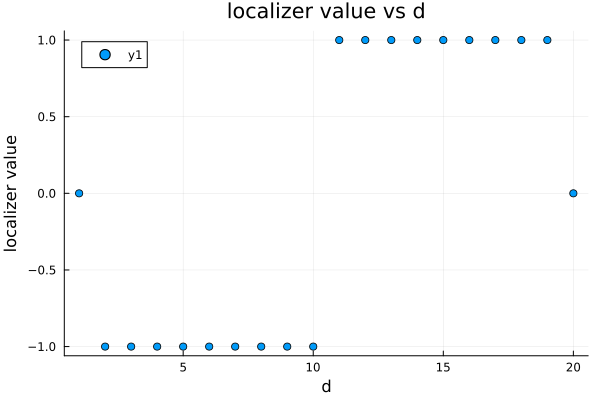

In [81]:
scatter(range(1,maxval,maxval), localizer_vals_diag, xlabel="d", ylabel="localizer value", title="localizer value vs d")

In [82]:
for ii = 1:Lx
    for jj = 1:Ly
        d_val = (ii+jj)/2;
        dmatrix_shiftedval = D1_parent - d_val*kron(const_2D,eye2,eye2);
        localizer_vals_all[ii,jj] = 0.5 * matrix_signature((dmatrix_shiftedval + im*h_2DHO)*chiral_matrix);
        println("localizer_vals[", ii, ",", jj, "] = ", localizer_vals_all[ii,jj])
    end
end

localizer_vals[1,1] = 0.0
localizer_vals[1,2] = -1.0
localizer_vals[1,3] = -1.0
localizer_vals[1,4] = -1.0
localizer_vals[1,5] = -1.0
localizer_vals[1,6] = -1.0
localizer_vals[1,7] = -1.0
localizer_vals[1,8] = -1.0
localizer_vals[1,9] = -1.0
localizer_vals[1,10] = -1.0
localizer_vals[1,11] = -1.0
localizer_vals[1,12] = -1.0
localizer_vals[1,13] = -1.0
localizer_vals[1,14] = -1.0
localizer_vals[1,15] = -1.0
localizer_vals[1,16] = -1.0
localizer_vals[1,17] = -1.0
localizer_vals[1,18] = -1.0
localizer_vals[1,19] = -1.0
localizer_vals[1,20] = 0.0
localizer_vals[2,1] = -1.0
localizer_vals[2,2] = -1.0
localizer_vals[2,3] = -1.0
localizer_vals[2,4] = -1.0
localizer_vals[2,5] = -1.0
localizer_vals[2,6] = -1.0
localizer_vals[2,7] = -1.0
localizer_vals[2,8] = -1.0
localizer_vals[2,9] = -1.0
localizer_vals[2,10] = -1.0
localizer_vals[2,11] = -1.0
localizer_vals[2,12] = -1.0
localizer_vals[2,13] = -1.0
localizer_vals[2,14] = -1.0
localizer_vals[2,15] = -1.0
localizer_vals[2,16] = -1.0
localizer_va

In [83]:
localizer_vals_all

20×20 Matrix{Float64}:
  0.0  -1.0  -1.0  -1.0  -1.0  -1.0  …  -1.0  -1.0  -1.0  -1.0  -1.0  0.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0  -1.0  -1.0   0.0  1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0  -1.0   0.0   1.0  1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0   0.0   1.0   1.0  1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0   0.0   1.0   1.0   1.0  1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  …   0.0   1.0   1.0   1.0   1.0  1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0      1.0   1.0   1.0   1.0   1.0  1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0      1.0   1.0   1.0   1.0   1.0  1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0      1.0   1.0   1.0   1.0   1.0  1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0      1.0   1.0   1.0   1.0   1.0  1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  …   1.0   1.0   1.0   1.0   1.0  1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0      1.0   1.0   1.0   1.0   1.0  1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0      1.0   1.0   1.0   1.0   1.0  1.0
 -1.0  -1.0  -1

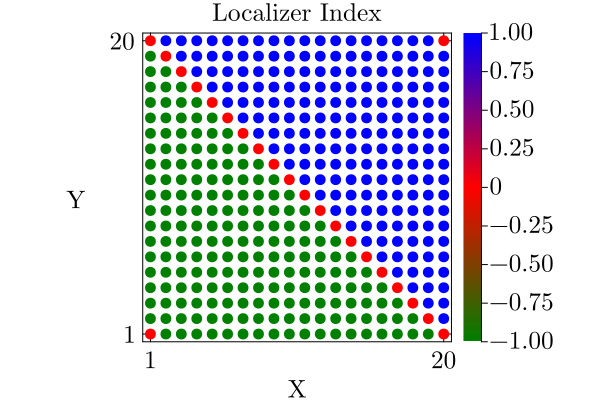

In [84]:
xx = range(1, stop=Lx, length=Lx)
yy = range(1, stop=Ly, length=Ly)

xx = repeat(xx, 1, Ly)'
yy = repeat(yy, 1, Lx)

	# point_size = 500 * vec(density')

plt = scatter(
    vec(xx), vec(yy),
    marker_z = vec(localizer_vals_all'),
    color = cgrad([:green, :red, :blue], [-1, 0, 1]), # Custom gradient
    colorbar = true,
    legend = false,
    xlabel = "X",
    ylabel = "Y",
    yguidefontrotation = 270, # Rotates the Y label vertically
    title = "Localizer Index",
    grid = false,
    markerstrokewidth = 0,
    aspect_ratio = 1,
    xlims = (0.5, Lx+0.5),             # Tight x-axis
    ylims = (0.5, Ly+0.5),              # Tight y-axis
    framestyle = :box,           # Box around plot
    xticks = [1, Lx],         # Set x-ticks
    yticks = [1, Ly],          # Set y-ticks
    tickfont = font(16, "Computer Modern"),
    guidefont = font(16, "Computer Modern"),
    titlefont = font(16, "Computer Modern"),
    markersize = 6
)

display(plt)

In [85]:
# Define the folder path (relative or absolute)
folder_path = "HOTI_parent_data/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

filename = "t0=$(t0)_t=$(t)_m_0=$(m_0)_Delta=$(Delta)_x_periodic=$(x_periodic)_y_periodic=$(y_periodic)_L=$(L).csv"

"t0=1.0_t=1.0_m_0=-1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=20.csv"

In [86]:
### save the plot titled plt
savefig(plt, string(folder_path, "localizer_index/", "localizer_spatial_dist_Lx$(Lx)_Ly$(Ly).pdf"))

"/work/submit/archi137/Documents/GitHub/lattices-julia/HOTI_parent_data/localizer_index/localizer_spatial_dist_Lx20_Ly20.pdf"

In [87]:
isdir(string(folder_path,"localizer_index/")) || mkdir(string(folder_path,"localizer_index/"))

if exportdata==1
    df = DataFrame(localizer_vals_all, :auto)  # Convert matrix to DataFrame
    CSV.write(string(folder_path,"localizer_index/",filename), df, writeheader=false)
end

"HOTI_parent_data/localizer_index/t0=1.0_t=1.0_m_0=-1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=20.csv"

In [88]:
### Here we plot the localizer value at a particular origin (x,y) in the 2D lattice

x1 = 3;
y1 = 3;

x2 = L-3;
y2 = L-3;

m0_vals = range(-2.5,2.5,41);

lacalizer_1_vals = zeros(length(m0_vals));
lacalizer_2_vals = zeros(length(m0_vals));

for ii = 1:length(m0_vals)
    m_00 = m0_vals[ii];
    h_2DHO = t*kron(SX2D,gamma_31) + t*kron(SY2D,gamma_32) + kron(m_00*const_2D + t0*(CX2D + CY2D),gamma_33) + Delta*kron(CX2D - CY2D,gamma_10);
    
    L_x_matrix = (X1_parent_shifted + im*h_2DHO)*chiral_matrix;
    
    d_val1 = (x1+y1)/2;
    dmatrix_shiftedval1 = D1_parent - d_val1*kron(const_2D,eye2,eye2);

    localizer_val1 = 0.5 * matrix_signature((dmatrix_shiftedval1 + im*h_2DHO)*chiral_matrix);

    d_val2 = (x2+y2)/2;
    dmatrix_shiftedval2 = D1_parent - d_val2*kron(const_2D,eye2,eye2);
    
    localizer_val2 = 0.5 * matrix_signature((dmatrix_shiftedval2 + im*h_2DHO)*chiral_matrix);

    lacalizer_1_vals[ii] = localizer_val1;
    lacalizer_2_vals[ii] = localizer_val2;
    
    println("localizer_val for m_0 = ", m_00, " is ", localizer_val1)
    println("localizer_val for m_0 = ", m_00, " is ", localizer_val2)

end

localizer_val for m_0 = -2.5 is 0.0
localizer_val for m_0 = -2.5 is 0.0
localizer_val for m_0 = -2.375 is 0.0
localizer_val for m_0 = -2.375 is 0.0
localizer_val for m_0 = -2.25 is 0.0
localizer_val for m_0 = -2.25 is 0.0
localizer_val for m_0 = -2.125 is 0.0
localizer_val for m_0 = -2.125 is 0.0
localizer_val for m_0 = -2.0 is 0.0
localizer_val for m_0 = -2.0 is 0.0
localizer_val for m_0 = -1.875 is 0.0
localizer_val for m_0 = -1.875 is 0.0
localizer_val for m_0 = -1.75 is 0.0
localizer_val for m_0 = -1.75 is 0.0
localizer_val for m_0 = -1.625 is -1.0
localizer_val for m_0 = -1.625 is 1.0
localizer_val for m_0 = -1.5 is -1.0
localizer_val for m_0 = -1.5 is 1.0
localizer_val for m_0 = -1.375 is -1.0
localizer_val for m_0 = -1.375 is 1.0
localizer_val for m_0 = -1.25 is -1.0
localizer_val for m_0 = -1.25 is 1.0
localizer_val for m_0 = -1.125 is -1.0
localizer_val for m_0 = -1.125 is 1.0
localizer_val for m_0 = -1.0 is -1.0
localizer_val for m_0 = -1.0 is 1.0
localizer_val for m_0 = -0.8

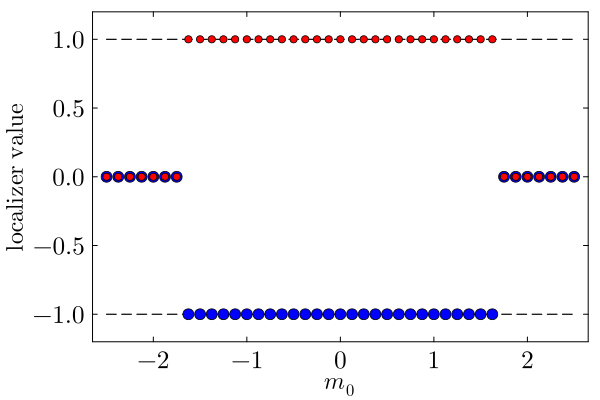

In [89]:

p4=plot([-2.5, 2.5], [1, 1], color=:black, linestyle=:dash, linewidth=1.2)
p4=plot!([-2.5, 2.5], [-1, -1], color=:black, linestyle=:dash, linewidth=1.2)

p4=scatter!(
    m0_vals, lacalizer_1_vals,
    label=L"\mathrm{localizer\ value\ at}\ (3,3)",
    xlabel=L"m_0",
    ylabel=L"\mathrm{localizer\ value}",
    # title=L"\mathrm{Localizer\ value\ vs}\ m_0",
    legend=:none,
    color=:blue,
    xtickfontsize=16,
    ytickfontsize=16,
    legendfontsize=16,
    titlefontsize=18,
    guidefontsize=16,
    markersize=6,
    ylims = (-1.2, 1.2),
    tickfontfamily="Computer Modern",
    framestyle=:box,
    grid=false
)
p4=scatter!(
    m0_vals, lacalizer_2_vals,
    label=L"\mathrm{localizer\ value\ at}\ (L-3,L-3)",
    color=:red,
    markersize=4
)

In [90]:
### save m_0 vs localizer value for two points
isdir(string(folder_path,"localizer_index/")) || mkdir(string(folder_path,"localizer_index/"))
if exportdata==1
    df = DataFrame(m_0 = m0_vals, localizer_val1 = lacalizer_1_vals, localizer_val2 = lacalizer_2_vals)  # Convert matrix to DataFrame
    CSV.write(string(folder_path,"localizer_index/","m0_vs_localizer.csv"), df, writeheader=false)
end

"HOTI_parent_data/localizer_index/m0_vs_localizer.csv"

In [113]:
savefig(p4, string(folder_path, "localizer_index/", "m0_vs_localizer_Lx$(Lx)_Ly$(Ly).pdf"))

"/work/submit/archi137/Documents/GitHub/lattices-julia/HOTI_parent_data/localizer_index/m0_vs_localizer_Lx20_Ly20.pdf"

### The following (commented out to save execution time) is the code for local Chern marker in the parent lattice

In [92]:
# XList_parent = kron(range(1,1,Ly),range(1,Lx,Lx))
# YList_parent = kron(range(1,Ly,Ly),range(1,1,Lx))


# X1_parent = kron(diagm(XList_parent),eye2,eye2)
# Y1_parent = kron(diagm(YList_parent),eye2,eye2)

# (energy_eigenvalues_parent, eigenstates_parent) = eigen(h_SC_chern);
# filled_eigenstates_parent = eigenstates_parent[:,1:2*Lx*Ly];

# ## We create a projector P, which projects to the space of filled eigenstates (half-filled)
# P_parent = conj(filled_eigenstates_parent) * transpose(filled_eigenstates_parent)
# ## Q projects to the empty eigenstates
# Q_parent = kron(const_2D,eye2,eye2) - P_parent


# ## We define the local Chern operators, whose diagonal elements in the Wannier basis are the local Chern numbers per orbital
# ChernMatrix_parent = -4*pi*imag(P_parent * X1_parent * Q_parent * Y1_parent * P_parent);
# ChernMatrixDiagonalList_parent = diag(ChernMatrix_parent)
# ChernMatrixSiteWiseList_parent = zeros(Lx*Ly)
# ## Here we add the two chern numbers for the two orbitals
# for ii = 1:Lx*Ly
#     ChernMatrixSiteWiseList_parent[ii] = ChernMatrixDiagonalList_parent[4*(ii-1) + 1] + ChernMatrixDiagonalList_parent[4*(ii-1) + 2] + ChernMatrixDiagonalList_parent[4*(ii-1) + 3] + ChernMatrixDiagonalList_parent[4*(ii-1) + 4]
# end

# println(ChernMatrixSiteWiseList_parent)

In [93]:
# println("size eigenstates_parent = ", size(eigenstates_parent))
# println("size filled_eigenstates_parent = ", size(filled_eigenstates_parent))
# println("size P = ", size(P_parent))

In [94]:
# plt1 = scatter(1:4*Lx*Ly, energy_eigenvalues_parent)
# display(plt1)

In [95]:
# Gap_parent = minimum(abs.(energy_eigenvalues_parent))

### I plot the local Chern marker at the middle line $y = L_y/2$ of the lattice

In [96]:
# ### We will plot the local Chern marker along the line y = Ly/2
# plt_Chern_parent = scatter(1:Lx, ChernMatrixSiteWiseList_parent[(Int(round(Ly/2)) - 1)*Lx+1:(Int(round(Ly/2)) - 1)*Lx+Lx], ylims=(-3,3), 
#                 xlabel="x", ylabel="Perent lattice Local Chern marker at y=L/2", legend=:none,
#                 title=string("Lx = ", string(Lx), ", t = ", string(t), ", Delta = ", string(Delta), ", m0 = ", string(m_0), ", mu = ", string(mu)))
# display(plt_Chern_parent)

In [97]:
function plotState(local_density, Lx, Ly)
	
	density = zeros(Lx,Ly)

	for a = 1:Lx
		for b = 1:Ly
			density[a,b] = local_density[a + (b-1)*Lx];
		end
	end


	xx = range(1, stop=Lx, length=Lx)
	yy = range(1, stop=Ly, length=Ly)

	xx = repeat(xx, 1, Ly)'
	yy = repeat(yy, 1, Lx)

	# point_size = 500 * vec(density')

	plt = scatter(
		vec(xx), vec(yy),
		marker_z = vec(density'),
		color = cgrad([:white, :red]),
		# ms = point_size,
legend = false,
xlabel = "X",
ylabel = "Y",
title = "Joint LDoS of two states closest to zero",
markerstrokewidth = 0,
aspect_ratio = 1
)

display(plt)
end

plotState (generic function with 1 method)

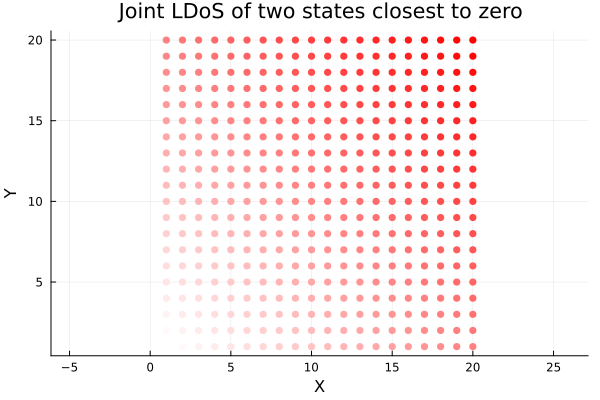

In [98]:
dummy_density = zeros(20,20)

for ii = 1:20
    for jj = 1:20
        dummy_density[ii,jj] = ii + jj;
    end
end

dummy_density = vec(dummy_density)
dummy_density = dummy_density ./ sum(dummy_density)  # Normalize the density for better visualization
plotState(dummy_density, 20, 20)


In [99]:
function EnergyEigenvaluesForFixedm(Lx_here::Int64, Ly_here::Int64, m_Hamil::Float64, t0_Hamil::Float64, Delta_Hamil::Float64)
    #close("all")
    #t0=time()
    Jx, Jy, Jz = generate_spin_matrices(1/2)
    sigma_x = 2*Jx;
    sigma_y = 2*Jy;
    sigma_z = 2*Jz;
    const_2D, CX2Dp, SX2Dp, CY2Dp, SY2Dp = generate_matrices_2D(Lx_here, Ly_here,1, 1)
    const_2D, CX2Dnp, SX2Dnp, CY2Dnp, SY2Dnp = generate_matrices_2D(Lx_here, Ly_here,0, 0)

    nAtoms = (Lx_here*Ly_here)
    nStates = 4*nAtoms

    tt = 1.0

    energies_np_array = zeros(nStates)
    energies_p_array = zeros(nStates)

    h_2DHO_np = tt*kron(SX2Dnp,gamma_31) + tt*kron(SY2Dnp,gamma_32) + kron(m_Hamil*const_2D + t0_Hamil*(CX2Dnp + CY2Dnp),gamma_33) + Delta_Hamil*kron(CX2Dnp - CY2Dnp,gamma_10)
    h_2DHO_p = tt*kron(SX2Dp,gamma_31) + tt*kron(SY2Dp,gamma_32) + kron(m_Hamil*const_2D + t0_Hamil*(CX2Dp + CY2Dp),gamma_33) + Delta_Hamil*kron(CX2Dp - CY2Dp,gamma_10)


        eig_np = eigen(h_2DHO_np);
        eig_p = eigen(h_2DHO_p);

        energy_eigenvalues_np = eig_np.values;
        energy_eigenvalues_p = eig_p.values;
        
        for r=1:nStates
            energies_np_array[r] = energy_eigenvalues_np[r];
            energies_p_array[r] = energy_eigenvalues_p[r];
        end
    println(energies_np_array[2*nAtoms])
    interesting_local_density_np = zeros(nAtoms);
    for ii = 1: nAtoms
        interesting_local_density_np[ii] = (abs(eig_np.vectors[4*ii-3, 2*nAtoms-1])^2 + abs(eig_np.vectors[4*ii-2, 2*nAtoms-1])^2 + abs(eig_np.vectors[4*ii-1, 2*nAtoms-1])^2 + abs(eig_np.vectors[4*ii, 2*nAtoms-1])^2) + (abs(eig_np.vectors[4*ii-3, 2*nAtoms])^2 + abs(eig_np.vectors[4*ii-2, 2*nAtoms])^2 + abs(eig_np.vectors[4*ii-1, 2*nAtoms])^2 + abs(eig_np.vectors[4*ii, 2*nAtoms])^2) + (abs(eig_np.vectors[4*ii-3, 2*nAtoms+1])^2 + abs(eig_np.vectors[4*ii-2, 2*nAtoms+1])^2 + abs(eig_np.vectors[4*ii-1, 2*nAtoms+1])^2 + abs(eig_np.vectors[4*ii, 2*nAtoms+1])^2) + (abs(eig_np.vectors[4*ii-3, 2*nAtoms+2])^2 + abs(eig_np.vectors[4*ii-2, 2*nAtoms+2])^2 + abs(eig_np.vectors[4*ii-1, 2*nAtoms+2])^2 + abs(eig_np.vectors[4*ii, 2*nAtoms+2])^2)
    end
    #t1 = time()
    #println("time taken = ", t1 - t0, "seconds")
    plt1 = scatter(1:nStates, energies_np_array, legend = false, xtickfontsize = 20, ytickfontsize = 20, legendfontsize = 20, markersize=1.0, xlabel=L"m", ylabel=L"E", framestyle = :box, linewidth=5, reuse=false, title="Allowed energies for OBC", titlefontsize=20)
    plt1pt5 = scatter(energies_np_array[Int(round(nStates/2)) - 3 : Int(round(nStates/2)) + 3], legend = false)
    plt2 = scatter(1:nStates, energies_p_array, legend = false, xtickfontsize = 20, ytickfontsize = 20, legendfontsize = 20, markersize=1.0, xlabel=L"m", ylabel=L"E", framestyle = :box, linewidth=5, reuse=false, xlims=(2*nAtoms-3,2*nAtoms+3), title="Allowed energies for PBC", titlefontsize=20)
    plt3 = scatter(1:nStates, energies_p_array, legend = false, xtickfontsize = 20, ytickfontsize = 20, legendfontsize = 20, markersize=1.0, xlabel=L"m", ylabel=L"E", framestyle = :box, linewidth=5, reuse=false, title="Allowed energies for PBC", titlefontsize=20)
    display(plt1)
    display(plt1pt5)
    display(plt2)
    display(plt3)
    plotState(interesting_local_density_np,Lx_here,Ly_here)

    isdir(string(folder_path,"LDOS/")) || mkdir(string(folder_path,"LDOS/"))

    filename_here = "t0=$(t0)_t=$(t)_m_0=$(m_0)_Delta=$(Delta)_x_periodic=$(x_periodic)_y_periodic=$(y_periodic)_L=$(Lx_here).csv"

    if exportdata==1
        CSV.write(string(folder_path,"LDOS/",filename_here), (; interesting_local_density_np),writeheader=false)
    end

    isdir(string(folder_path,"energies/")) || mkdir(string(folder_path,"energies/"))

    if exportdata==1
        CSV.write(string(folder_path,"energies/",filename_here), (; energies_np_array),writeheader=false)
    end
end

EnergyEigenvaluesForFixedm (generic function with 1 method)

Verified: Building Block Matrices are Hermitian
Verified: Building Block Matrices are Hermitian
-6.989025389750505e-13


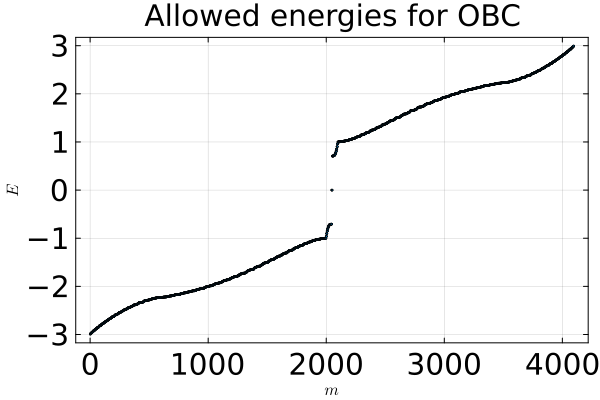

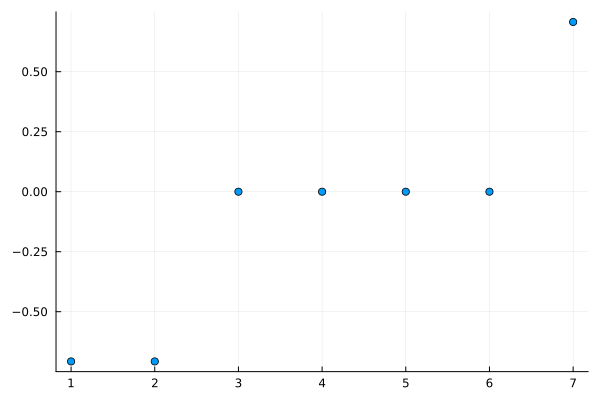

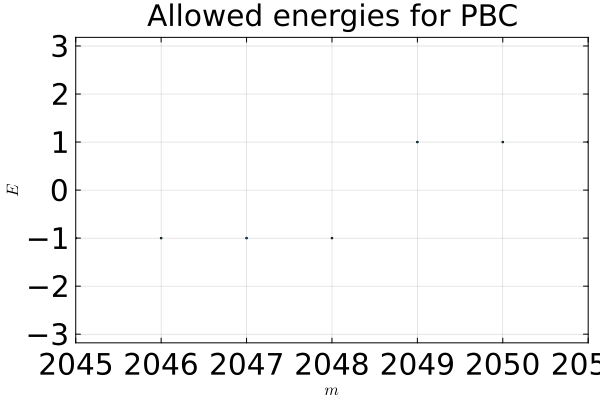

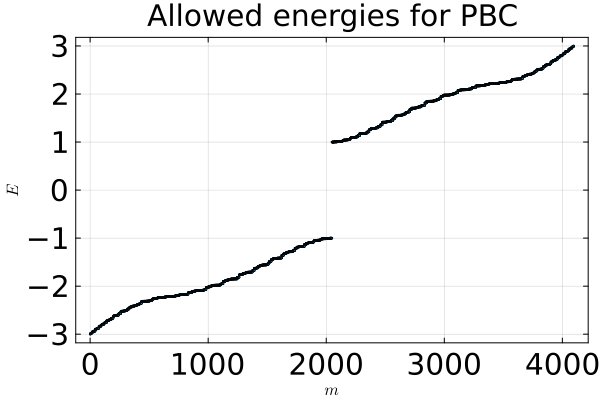

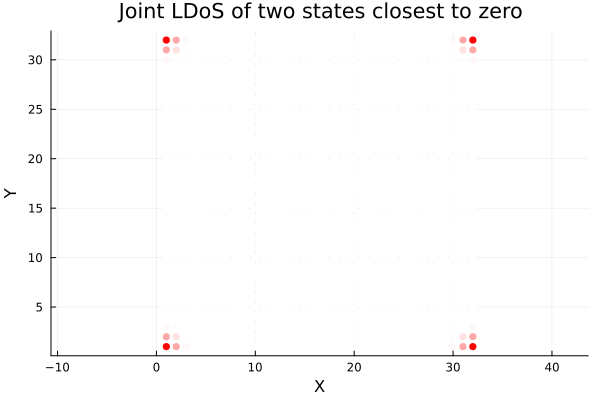

"HOTI_parent_data/energies/t0=1.0_t=1.0_m_0=-1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=32.csv"

In [100]:
# EnergyEigenvaluesForFixedm(L, L, m_0, t0, Delta)

EnergyEigenvaluesForFixedm(32, 32, 1.0, 1.0, 1.0)

In [101]:
### Calculation of quadrupolar moment

n_al = 0;
for ii = 1:L
    for jj = 1:L
        n_al += 0.5*(4)*(ii*jj)/L^2;
    end
end

println("n_al = ", n_al)

n_al = 220.49999999999997


In [102]:
(energy_eigenvalues_parent, eigenstates_parent) = eigen(h_2DHO);

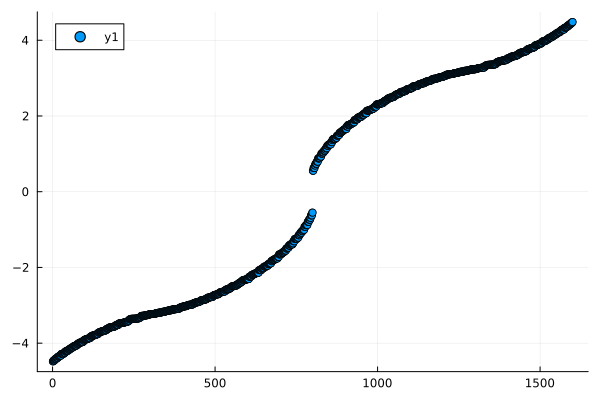

In [103]:
scatter(1:4*L^2,energy_eigenvalues_parent)

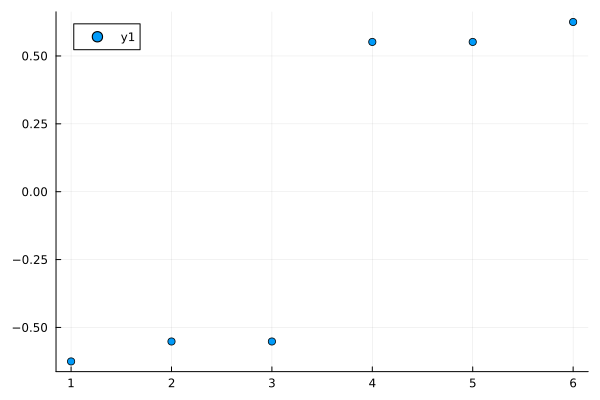

In [104]:
scatter(energy_eigenvalues_parent[2*L^2-2:2*L^2+3])

In [105]:
energy_eigenvalues_parent[2*L^2-2], energy_eigenvalues_parent[2*L^2-1], energy_eigenvalues_parent[2*L^2], energy_eigenvalues_parent[2*L^2+1], energy_eigenvalues_parent[2*L^2+2], energy_eigenvalues_parent[2*L^2+3]

(-0.6250874759081101, -0.5516521354580648, -0.551652135458058, 0.5516521354580559, 0.551652135458059, 0.6250874759081141)

In [106]:
filled_eigenstates_parent = eigenstates_parent[:,1:2*Lx*Ly];

In [107]:
size(filled_eigenstates_parent)

(1600, 800)

In [108]:
println(points_x_array)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 

In [109]:
W_matrix = zeros(4*Lx*Ly, 2*Lx*Ly)*im;

for ii = 1:Lx*Ly
    for jj = 1:2*Lx*Ly
        W_matrix[4*ii-3,jj] = exp(1im*2*pi*points_x_array[ii]*points_y_array[ii]/L^2) * filled_eigenstates_parent[4*ii-3,jj];
        W_matrix[4*ii-2,jj] = exp(1im*2*pi*points_x_array[ii]*points_y_array[ii]/L^2) * filled_eigenstates_parent[4*ii-2,jj];
        W_matrix[4*ii-1,jj] = exp(1im*2*pi*points_x_array[ii]*points_y_array[ii]/L^2) * filled_eigenstates_parent[4*ii-1,jj];
        W_matrix[4*ii,jj] = exp(1im*2*pi*points_x_array[ii]*points_y_array[ii]/L^2) * filled_eigenstates_parent[4*ii,jj];
    end
end

In [110]:
n = real((-1im/(2*pi)) * tr(log(conj(transpose(filled_eigenstates_parent))*W_matrix)))

78.50000000000009

In [111]:
mod(n - n_al,1)

1.1368683772161603e-13

In [112]:
t_end = time();
println("Total time taken = ", t_end - t_start, " seconds")

Total time taken = 339.25840306282043 seconds
